In [1]:
import ML_Coupling.mo_descriptor as md
import ML_Coupling.nn_frame as nn
import numpy as np
import subprocess
subprocess.run('export TF_INTRA_OP_PARALLELISM_THREADS=12', shell=True)

2023-05-06 09:11:20.500350: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-06 09:11:20.500508: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


CompletedProcess(args='export TF_INTRA_OP_PARALLELISM_THREADS=12', returncode=0)

In [2]:
'''
prepare data_set
1. make mo_pair descriptor
'''
# x_shift = np.arange(0, 4.1, 0.1)
# y_shift = np.arange(0, 4.1, 0.1)
# z_shift = np.zeros(x_shift.shape)
# # the original mo, e.g. homo
# homo = md.MO_descriptor('data/homo-s0.cube').make()
# lumo = md.MO_descriptor('data/lumo-s0.cube').make()

# # for the original pair of one mo and itself
# homo_pair = md.MO_pair_descriptor(homo, homo).make()
# lumo_pair = md.MO_pair_descriptor(lumo, lumo).make()

# homo_pairs = np.zeros((len(x_shift)*len(y_shift),) + homo_pair.shape)
# lumo_pairs = np.zeros((len(x_shift)*len(y_shift),) + lumo_pair.shape)

# homo_ = np.zeros(homo.shape)
# lumo_ = np.zeros(lumo.shape)

# for ii, i in enumerate(x_shift):
#     for jj, j in enumerate(y_shift):
#         idx = ii * len(y_shift) + jj
#         homo_[:,0] = np.add(homo[:,0],0)
#         homo_[:,1] = np.add(homo[:,1],i)
#         homo_[:,2] = np.add(homo[:,2],j)
#         homo_[:,3] = np.add(homo[:,3],0)
        
#         homo_pair_ = md.MO_pair_descriptor(homo, homo_).make()
#         homo_pairs[idx] = homo_pair_
        
#         lumo_[:,0] = np.add(lumo[:,0],0)
#         lumo_[:,1] = np.add(lumo[:,1],i)
#         lumo_[:,2] = np.add(lumo[:,2],j)
#         lumo_[:,3] = np.add(lumo[:,3],0)
        
#         lumo_pair_ = md.MO_pair_descriptor(lumo, lumo_).make()
#         lumo_pairs[idx] = lumo_pair_

# np.save('homo_homo_pair.npy', homo_pairs)
# np.save('lumo_lumo_pair.npy', lumo_pairs)
homo_pairs = np.load('./data/homo_homo_pair.npy')
lumo_pairs = np.load('./data/lumo_lumo_pair.npy')

In [3]:
'''
2. read coupling
'''
raw_data = np.loadtxt('./data/results.csv', delimiter=',',comments='#')
c_dexter = abs(np.array(raw_data[:,5]))

In [5]:
mo_pairs = []
for ii, i in enumerate(homo_pairs):
    mo_pairs.append((homo_pairs[ii],lumo_pairs[ii]))
mo_pairs = np.array(mo_pairs)

n = 5
istart = n * 1681
iend = (n+1) * 1681

train_mo_pairs = mo_pairs[istart:iend]
train_c_dexter = -np.log(c_dexter)[istart:iend]

/home/dgg95223/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [5]:
setting = {'activation':'tanh', 'nn_shape':(256,256,256,256), 'batch_size':1681, 'training_steps':200000,\
'learning_rate': 0.00001, 'decay_rate':0.95, 'decay_per_steps':1000, 'save_step':1000, 'drop_rate':0, 'save_path':'./save2',\
'seed':None, 'debug_traj': True}
NN = nn.NN(setting_dict=setting)
NN.train(train_mo_pairs,train_c_dexter)

2022-09-15 11:19:43.822015: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-15 11:19:43.822076: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-15 11:19:43.822111: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Bai-Group): /proc/driver/nvidia/version does not exist
2022-09-15 11:19:43.823845: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


loss:  39.7090149
training step:     0
loss:  3.07838154
training step:  1000
loss:  1.21926045
training step:  2000
loss:  0.78811121
training step:  3000
loss:  0.572090089
training step:  4000
loss:  0.480240583
training step:  5000
loss:  0.416151464
training step:  6000
loss:  0.376663685
training step:  7000
loss:  0.333920032
training step:  8000
loss:  0.294292718
training step:  9000
loss:  0.259100109
training step: 10000
loss:  0.219147414
training step: 11000
loss:  0.176130861
training step: 12000
loss:  0.146329448
training step: 13000
loss:  0.120097578
training step: 14000
loss:  0.102580972
training step: 15000
loss:  0.0759141594
training step: 16000
loss:  0.062707454
training step: 17000
loss:  0.0534163192
training step: 18000
loss:  0.049268961
training step: 19000
loss:  0.0441662483
training step: 20000
loss:  0.0392167978
training step: 21000
loss:  0.0327843241
training step: 22000
loss:  0.0312579386
training step: 23000
loss:  0.0312624834
training step: 240

2022-09-15 12:57:59.983498: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./save2/model/assets


In [6]:
imodel = 37063
setting = {'activation':'tanh','nn_shape':(256,256,256,256),'batch_size':len(train_c_dexter), 'training_steps':200000,\
'learning_rate': 0.00008, 'decay_rate':0.95, 'decay_per_steps':1000, 'save_step':1000, 'drop_rate':0, 'save_path':'./trained_model/trans/nat_dimer_homo_trans_%d'%len(train_c_dexter),\
'seed':None, 'debug_traj':False, 'pre_trained_path':'./trained_model/trans/nat_dimer_dexter_trans_%d/model/'%imodel}
NN_dex = nn.NN(setting_dict=setting)
pred_dex = np.exp(-NN_dex.model(train_mo_pairs, training=False).numpy().reshape((len(train_mo_pairs),)))
error_dex = np.mean(np.multiply(abs(pred_dex-np.exp(-train_c_dexter)), np.power(np.exp(-train_c_dexter),-1))*100)
print(error_dex)

2023-05-06 09:11:39.062146: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-06 09:11:39.062296: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Deng-PC): /proc/driver/nvidia/version does not exist
2023-05-06 09:11:39.062774: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11.047173293000046


In [35]:
idzero = []
for ii,i in np.ndenumerate(c_dexter[istart:iend]):
    if i<=0.000001:
        idzero.append(ii)
print('Number of points to be deleted for dexter:  ',len(idzero))
mo_pairs_  = np.delete(mo_pairs[istart:iend] , idzero, 0)
c_dexter_ = np.delete(c_dexter[istart:iend] , idzero, 0)
pred_dex_ = np.exp(-NN_dex.model(mo_pairs_, training=False).numpy().reshape((len(mo_pairs_),)))
error_dex_ = np.mean(np.multiply(abs(pred_dex_-c_dexter_), np.power(c_dexter_,-1))*100)
print(error_dex_)

Number of points to be deleted for dexter:   15
4.233195522216799


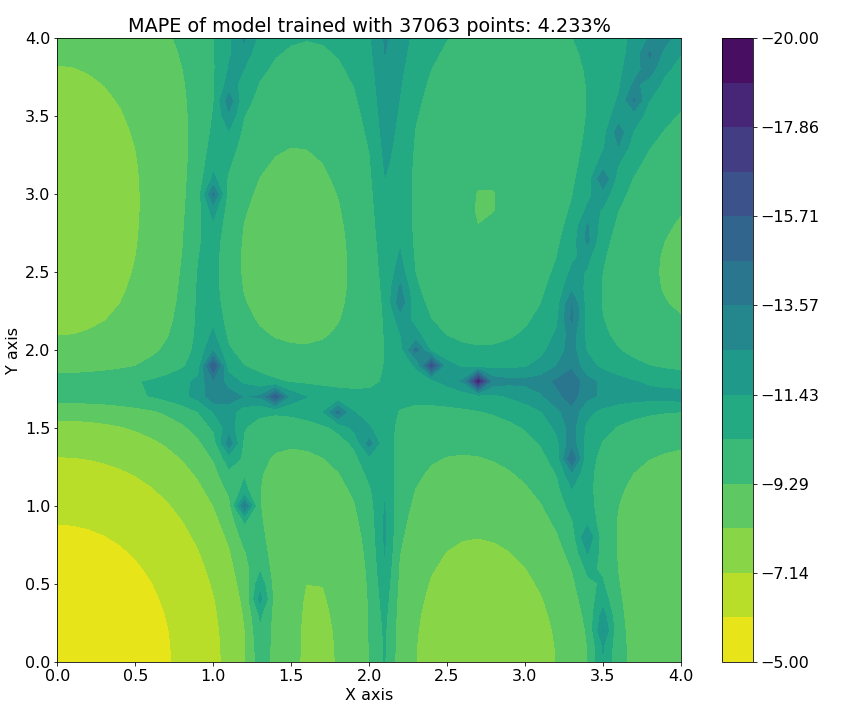

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
x = np.linspace(0, 4, 41)
y = np.linspace(0, 4, 41)
Z = -train_c_dexter.reshape((41,41))
Z1 = np.log(pred_dex).reshape((41,41))

l = np.linspace(-20,-5,15)
fig1, ax1 = plt.subplots(figsize=(12,10))
plt.rcParams.update({'font.size':16})
plt.rc('font',family='Times New Roman')

a1=ax1.contourf(x,y,Z.T,levels=l)
ax1.set_title('MAPE of model trained with %d points: %5.3f%%'%(imodel,error_dex_))
# ax1.set_title('True')
ax1.set_aspect('equal')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
plt.tight_layout()
fig1.colorbar(a1)

# plt.savefig('2d_true_dexter.png')
# plt.savefig('2d_%d_dexter.png'%imodel)

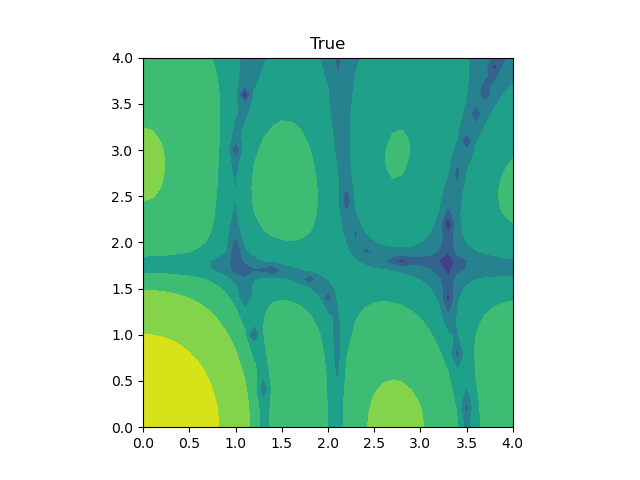

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
x = np.linspace(0, 4, 41)
y = np.linspace(0, 4, 41)
Z1 = c_dexter.reshape((41,41))

fix, ax = plt.subplots()
ax.contourf(x,y, np.log(Z1.T))
ax.set_title('True')
ax.set_aspect('equal')
plt.savefig('dexter_true.png')

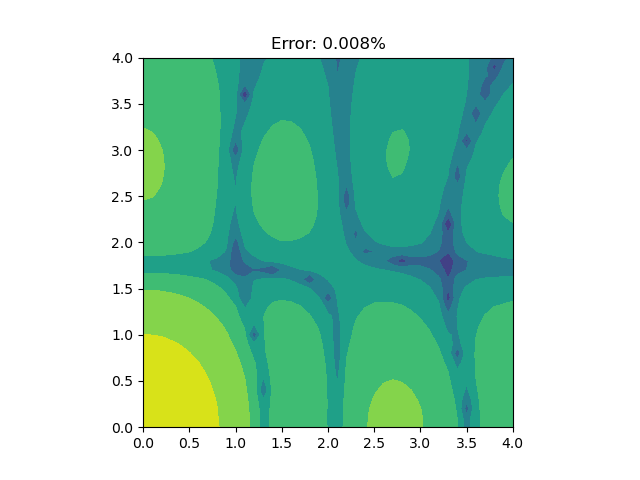

In [7]:
error = np.mean(np.multiply(NN.model(train_mo_pairs, training=False).numpy().reshape((1681,))-train_c_dexter, np.power(train_c_dexter,-1))*100)
Z = NN.model(train_mo_pairs, training=False).numpy().reshape((41,41))

fix, ax = plt.subplots()
ax.contourf(x,y, -Z.T)
ax.set_aspect('equal')
ax.set_title('Error: %5.3f%%'%error)
plt.savefig('dexter_pred.png')

In [8]:
print(Z1.T)

[[1.30743e-01 1.29124e-01 1.24354e-01 ... 4.86700e-03 5.89800e-03
  6.57200e-03]
 [1.29589e-01 1.27982e-01 1.23245e-01 ... 4.88000e-03 5.90300e-03
  6.57300e-03]
 [1.26180e-01 1.24607e-01 1.19977e-01 ... 4.91300e-03 5.91300e-03
  6.56500e-03]
 ...
 [7.41600e-03 7.31300e-03 7.00300e-03 ... 7.10000e-05 2.68000e-04
  4.39000e-04]
 [6.68000e-03 6.58800e-03 6.31500e-03 ... 1.50000e-05 1.58000e-04
  3.11000e-04]
 [5.96500e-03 5.88500e-03 5.64500e-03 ... 7.90000e-05 7.30000e-05
  2.08000e-04]]
